In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data/Dengue_Daily_EN.csv')

# Make all columns visible
pd.set_option('display.max_columns', None)
df.head(5)

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Village_Living_Code,Enumeration_unit,Enumeration_unit_long,Enumeration_unit_lat,First_level_dissemination_unit,Second_level_dissemination_unit,County_infected,Township_infected,Village_infected,Village_infected_Code,Imported,Country_infected,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living,MOI_County_infected_Code,MOI_Township_infected_Code,MOI_County_infected,MOI_Township_infected
0,1998/01/02,NaN,1998/01/07,M,40-44,Pingtung County,Pingtung City,NaN,NaN,A1320-0136-00,120.505899,22.464207,A1320-04-008,A1320-04,NaN,NaN,NaN,NaN,N,NaN,1,NaN,10013.0,1001301.0,Pingtung County,Pingtung City,NaN,NaN,NaN,NaN
1,1998/01/03,NaN,1998/01/14,M,30-34,Pingtung County,Donggang Township,NaN,NaN,A1303-0150-00,120.453657,22.466339,A1303-09-007,A1303-09,NaN,NaN,NaN,NaN,Y,NaN,1,DENV2,10013.0,1001303.0,Pingtung County,Donggang Township,NaN,NaN,NaN,NaN
2,1998/01/13,NaN,1998/02/18,M,55-59,Yilan County,Yilan City,NaN,NaN,A0201-0449-00,121.751434,24.749215,A0201-23-006,A0201-23,NaN,NaN,NaN,NaN,Y,NaN,1,NaN,10002.0,1000201.0,Yilan County,Yilan City,NaN,NaN,NaN,NaN
3,1998/01/15,NaN,1998/01/23,M,35-39,Kaohsiung City,Lingya Dist.,NaN,NaN,A6408-0153-00,120.338159,22.630317,A6408-10-010,A6408-10,NaN,NaN,NaN,NaN,N,NaN,1,NaN,64.0,6400800.0,Kaohsiung City,Lingya District,NaN,NaN,NaN,NaN
4,1998/01/20,NaN,1998/02/04,M,55-59,Yilan County,Wujie Township,NaN,NaN,A0209-0232-00,121.798235,24.684508,A0209-10-005,A0209-10,NaN,NaN,NaN,NaN,N,NaN,1,NaN,10002.0,1000209.0,Yilan County,Wujie Township,NaN,NaN,NaN,NaN


In [3]:
# Show data types
df.dtypes

Date_Onset                          object
Date_Confirmation                   object
Date_Notification                   object
Sex                                 object
Age_Group                           object
County_living                       object
Township_living                     object
Village_Living                      object
Village_Living_Code                 object
Enumeration_unit                    object
Enumeration_unit_long              float64
Enumeration_unit_lat               float64
First_level_dissemination_unit      object
Second_level_dissemination_unit     object
County_infected                     object
Township_infected                   object
Village_infected                    object
Village_infected_Code               object
Imported                            object
Country_infected                    object
Number_of_confirmed_cases            int64
Serotype                            object
MOI_County_living_Code             float64
MOI_Townshi

In [4]:
# Convert date columns to datetime
df['Date_Onset'] = pd.to_datetime(df['Date_Onset'])
df['Date_Confirmation'] = pd.to_datetime(df['Date_Confirmation'])
df['Date_Notification'] = pd.to_datetime(df['Date_Notification'])

In [5]:
# Group dataset by year
df['Year'] = df['Date_Onset'].dt.year
annual_cases = df.groupby('Year')['Number_of_confirmed_cases'].sum().reset_index()

print(annual_cases)

    Year  Number_of_confirmed_cases
0   1998                        344
1   1999                         68
2   2000                        139
3   2001                        279
4   2002                       5373
5   2003                        145
6   2004                        427
7   2005                        306
8   2006                       1074
9   2007                       2179
10  2008                        714
11  2009                       1052
12  2010                       1896
13  2011                       1702
14  2012                       1478
15  2013                        860
16  2014                      15732
17  2015                      43784
18  2016                        744
19  2017                        343
20  2018                        533
21  2019                        640
22  2020                        137
23  2021                         12
24  2022                         88
25  2023                      26706
26  2024                    

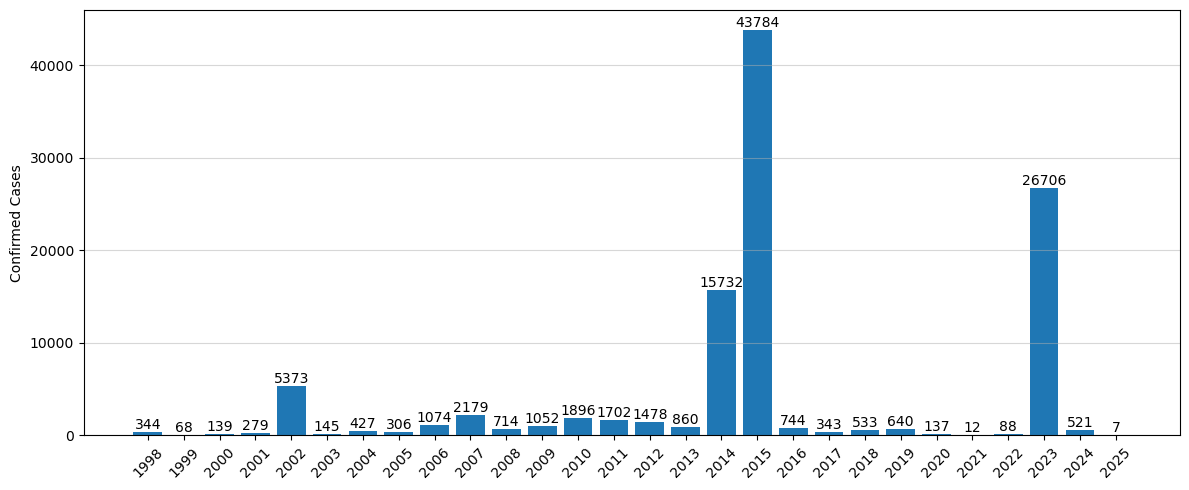

In [6]:
# Plot the number of confirmed cases grouped by year
plt.figure(figsize=(12, 5))
bars = plt.bar(annual_cases['Year'], annual_cases['Number_of_confirmed_cases'])
plt.ylabel('Confirmed Cases')

plt.xticks(annual_cases['Year'], rotation=45)  
plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [7]:
# Select only indigenous cases (not imported)
df_indig = df.loc[df['Imported'] == 'N']

df_indig.head(5)

,Date_Onset,Date_Confirmation,Date_Notification,Sex,Age_Group,County_living,Township_living,Village_Living,Village_Living_Code,Enumeration_unit,Enumeration_unit_long,Enumeration_unit_lat,First_level_dissemination_unit,Second_level_dissemination_unit,County_infected,Township_infected,Village_infected,Village_infected_Code,Imported,Country_infected,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living,MOI_County_infected_Code,MOI_Township_infected_Code,MOI_County_infected,MOI_Township_infected,Year
0,1998-01-02,NaT,1998-01-07,M,40-44,Pingtung County,Pingtung City,NaN,NaN,A1320-0136-00,120.505899,22.464207,A1320-04-008,A1320-04,NaN,NaN,NaN,NaN,N,NaN,1,NaN,10013.0,1001301.0,Pingtung County,Pingtung City,NaN,NaN,NaN,NaN,1998
3,1998-01-15,NaT,1998-01-23,M,35-39,Kaohsiung City,Lingya Dist.,NaN,NaN,A6408-0153-00,120.338159,22.630317,A6408-10-010,A6408-10,NaN,NaN,NaN,NaN,N,NaN,1,NaN,64.0,6400800.0,Kaohsiung City,Lingya District,NaN,NaN,NaN,NaN,1998
4,1998-01-20,NaT,1998-02-04,M,55-59,Yilan County,Wujie Township,NaN,NaN,A0209-0232-00,121.798235,24.684508,A0209-10-005,A0209-10,NaN,NaN,NaN,NaN,N,NaN,1,NaN,10002.0,1000209.0,Yilan County,Wujie Township,NaN,NaN,NaN,NaN,1998
6,1998-01-23,NaT,1998-02-02,M,40-44,New Taipei City,Xindian Dist.,NaN,NaN,A6506-0178-00,121.547480,24.982467,A6506-20-001,A6506-20,NaN,NaN,NaN,NaN,N,NaN,1,NaN,65.0,6500600.0,New Taipei City,Sindian District,NaN,NaN,NaN,NaN,1998
7,1998-01-26,NaT,1998-02-19,F,65-69,Taipei City,Beitou Dist.,NaN,NaN,A6312-0203-00,121.500936,25.139303,A6312-14-008,A6312-14,NaN,NaN,NaN,NaN,N,NaN,1,NaN,63.0,6301200.0,Taipei City,Beitou District,NaN,NaN,NaN,NaN,1998


In [8]:
# Group indigenous dataset by year
df_indig['Year'] = df_indig['Date_Onset'].dt.year
annual_indig_cases = df_indig.groupby('Year')['Number_of_confirmed_cases'].sum().reset_index()

print(annual_indig_cases)

    Year  Number_of_confirmed_cases
0   1998                        309
1   1999                         42
2   2000                        113
3   2001                        227
4   2002                       5321
5   2003                         86
6   2004                        336
7   2005                        202
8   2006                        965
9   2007                       2000
10  2008                        488
11  2009                        848
12  2010                       1592
13  2011                       1545
14  2012                       1271
15  2013                        596
16  2014                      15492
17  2015                      43419
18  2016                        381
19  2017                         10
20  2018                        183
21  2019                        100
22  2020                         73
23  2022                         20
24  2023                      26429
25  2024                        255


/var/folders/xj/422_hdhn1bz0x9_khxxv4d100000gn/T/ipykernel_18349/1050074351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indig['Year'] = df_indig['Date_Onset'].dt.year


In [9]:
# 2021 has 0 indiginous cases and needs to be added manually for visualisation
new_row = pd.DataFrame({'Year': [2021], 'Number_of_confirmed_cases': [0]})
annual_indig_cases = pd.concat([annual_indig_cases, new_row], ignore_index=True)

# Sort df by year to ensure chronological order
annual_indig_cases = annual_indig_cases.sort_values('Year').reset_index(drop=True)

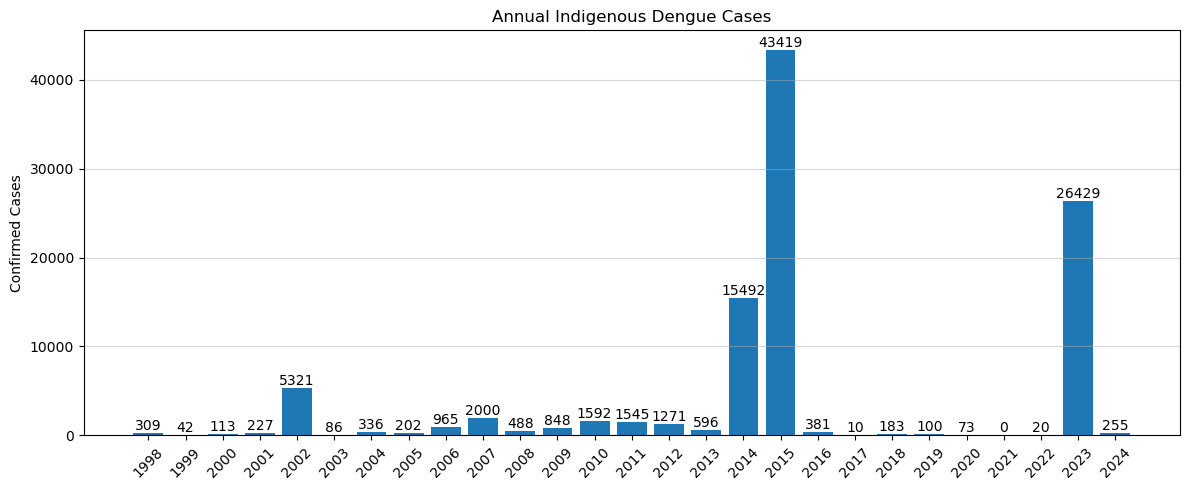

In [10]:
# Plot the number of indigenous confirmed cases grouped by year
plt.figure(figsize=(12, 5))
bars = plt.bar(annual_indig_cases['Year'], annual_indig_cases['Number_of_confirmed_cases'])
plt.title('Annual Indigenous Dengue Cases')
plt.ylabel('Confirmed Cases')

plt.xticks(annual_indig_cases['Year'], rotation=45)
plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
# Group indigenous dataset by month
df_indig['Month'] = df_indig['Date_Onset'].dt.month
monthly_indig_cases = df_indig.groupby('Month')['Number_of_confirmed_cases'].sum().reset_index()

print(monthly_indig_cases)

    Month  Number_of_confirmed_cases
0       1                        759
1       2                         75
2       3                         33
3       4                         43
4       5                         85
5       6                        610
6       7                       2493
7       8                      10518
8       9                      29760
9      10                      27744
10     11                      23065
11     12                       7118


/var/folders/xj/422_hdhn1bz0x9_khxxv4d100000gn/T/ipykernel_18349/2790064203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indig['Month'] = df_indig['Date_Onset'].dt.month


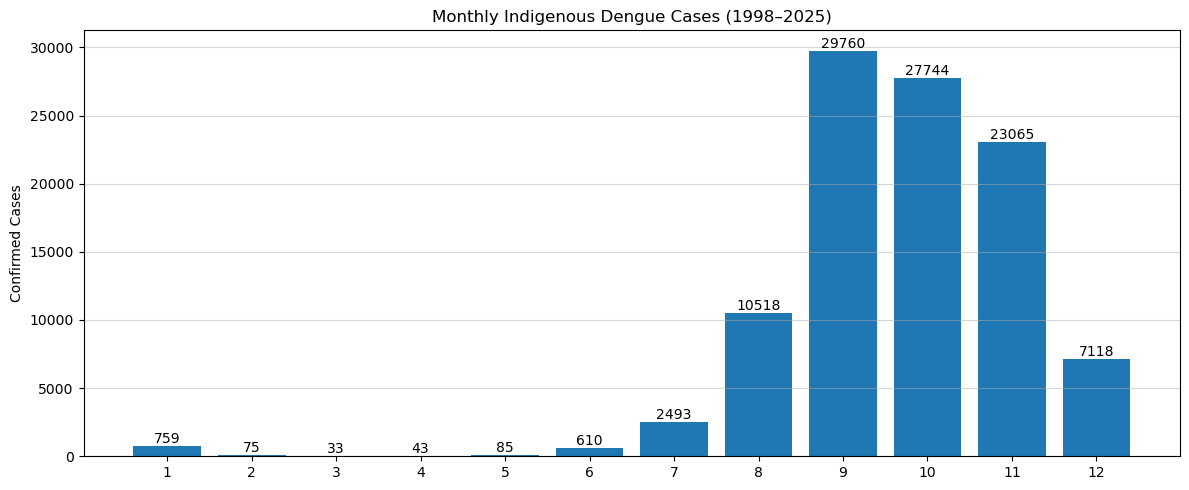

In [12]:
# Plot the number of indigenous confirmed cases grouped by month
plt.figure(figsize=(12, 5))
bars = plt.bar(monthly_indig_cases['Month'], monthly_indig_cases['Number_of_confirmed_cases'])
plt.title('Monthly Indigenous Dengue Cases (1998–2025)')
plt.ylabel('Confirmed Cases')

plt.xticks(monthly_indig_cases['Month'])
plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

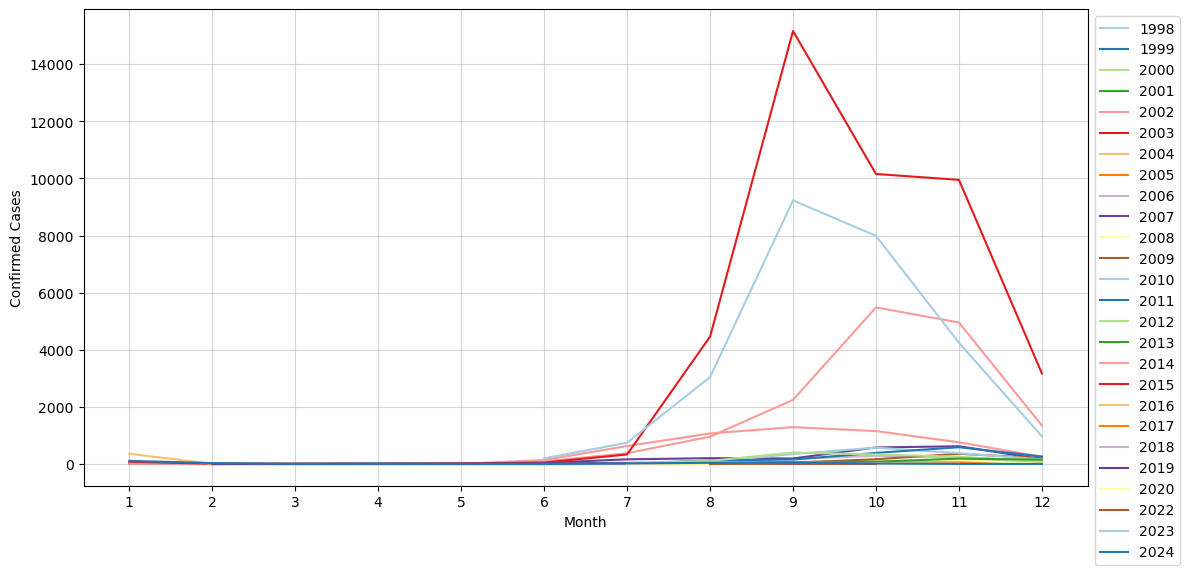

In [13]:
# Plot monthly time series of indigenous confirmed cases
montly_data = df_indig.groupby(['Year', 'Month'])['Number_of_confirmed_cases'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(montly_data, x="Month", y="Number_of_confirmed_cases", hue="Year", palette="Paired")

# Add grid lines
plt.grid(axis='x', alpha=0.5)
plt.grid(axis='y', alpha=0.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(range(1, 13))
plt.ylabel('Confirmed Cases')
plt.tight_layout()
plt.show()

In [14]:
def count_nan_values(df, column_name):
    """
    Counts how many NaN values there are in a selected column.
    """
    total_rows = len(df[column_name])
    non_nan_count = df[column_name].count()
    
    #print(f"Total rows: {total_rows}")
    #print(f"Non-NaN values: {non_nan_count}")
    print(f"NaN values in {column_name}: {total_rows - non_nan_count}")

In [15]:
count_nan_values(df_indig, 'MOI_Township_living_Code')
count_nan_values(df_indig, 'MOI_Township_infected_Code')
count_nan_values(df_indig, 'MOI_County_infected_Code')

count_nan_values(df_indig, 'Date_Onset')
count_nan_values(df_indig, 'Date_Confirmation')
count_nan_values(df_indig, 'Date_Notification')

NaN values in MOI_Township_living_Code: 427
NaN values in MOI_Township_infected_Code: 14097
NaN values in MOI_County_infected_Code: 14097
NaN values in Date_Onset: 0
NaN values in Date_Confirmation: 6015
NaN values in Date_Notification: 0


In [16]:
# Group indigenous dataset by county (MOI_County_infected_Code)
indig_cases_county = df_indig.groupby(['MOI_County_infected_Code', 'MOI_County_infected', 'Year'])['Number_of_confirmed_cases'].sum().reset_index().sort_values(by='Number_of_confirmed_cases', ascending=False)

print(indig_cases_county)

    MOI_County_infected_Code MOI_County_infected  Year  \
66                      67.0         Tainan City  2015   
24                      64.0      Kaohsiung City  2015   
23                      64.0      Kaohsiung City  2014   
70                      67.0         Tainan City  2023   
11                      64.0      Kaohsiung City  2002   
..                       ...                 ...   ...   
82                   10005.0       Miaoli County  2011   
9                       64.0      Kaohsiung City  1998   
83                   10005.0       Miaoli County  2015   
84                   10005.0       Miaoli County  2024   
33                      65.0     New Taipei City  2009   

    Number_of_confirmed_cases  
66                      23049  
24                      19891  
23                      15109  
70                      14863  
11                       2759  
..                        ...  
82                          1  
9                           1  
83             

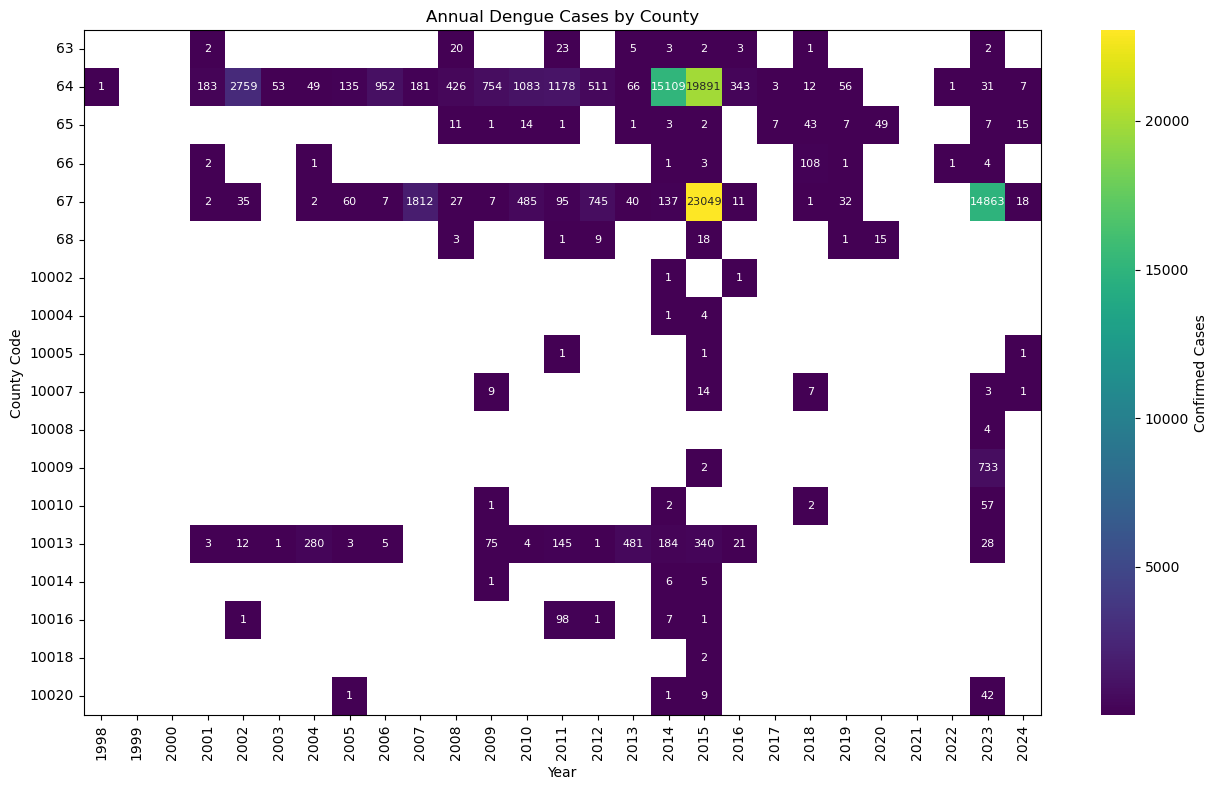

In [17]:
# Convert code column to integers 
indig_cases_county['MOI_County_infected_Code'] = indig_cases_county['MOI_County_infected_Code'].astype(int) 

# Create complete range of years
years = list(range(1998, 2025))

# Pivot the data for heatmap
heatmap_data = indig_cases_county.pivot(index='MOI_County_infected_Code', 
                                   columns='Year', 
                                   values='Number_of_confirmed_cases')

# Reindex with all years, missing values will be filled with NaN
heatmap_data = heatmap_data.reindex(columns=years)

plt.figure(figsize=(13, 8))

sns.heatmap(heatmap_data, 
            cmap='viridis', 
            annot=True, 
            fmt='.0f', 
            cbar_kws={'label': 'Confirmed Cases'},
            #square=True,
            annot_kws={'size': 8})

# Add frame around the heatmap
for spine in plt.gca().spines.values():
    spine.set_visible(True)

plt.title('Annual Dengue Cases by County')
plt.ylabel('County Code')
plt.tight_layout()
plt.show()

In [18]:
# Group indigenous dataset by township (MOI_Township_infected_Code)
indig_cases_ts = df_indig.groupby(['MOI_Township_infected_Code', 'Year', 'MOI_County_infected_Code'])['Number_of_confirmed_cases'].sum().reset_index().sort_values(by='Number_of_confirmed_cases', ascending=False)

print(indig_cases_ts)

     MOI_Township_infected_Code  Year  MOI_County_infected_Code  \
760                   6703400.0  2015                      67.0   
270                   6400500.0  2015                      64.0   
269                   6400500.0  2014                      64.0   
802                   6703700.0  2015                      67.0   
743                   6703300.0  2015                      67.0   
..                          ...   ...                       ...   
547                   6500300.0  2011                      65.0   
546                   6500200.0  2013                      65.0   
658                   6702100.0  2007                      67.0   
659                   6702100.0  2013                      67.0   
0                     1000202.0  2014                   10002.0   

     Number_of_confirmed_cases  
760                       5767  
270                       4744  
269                       4014  
802                       3539  
743                       3521

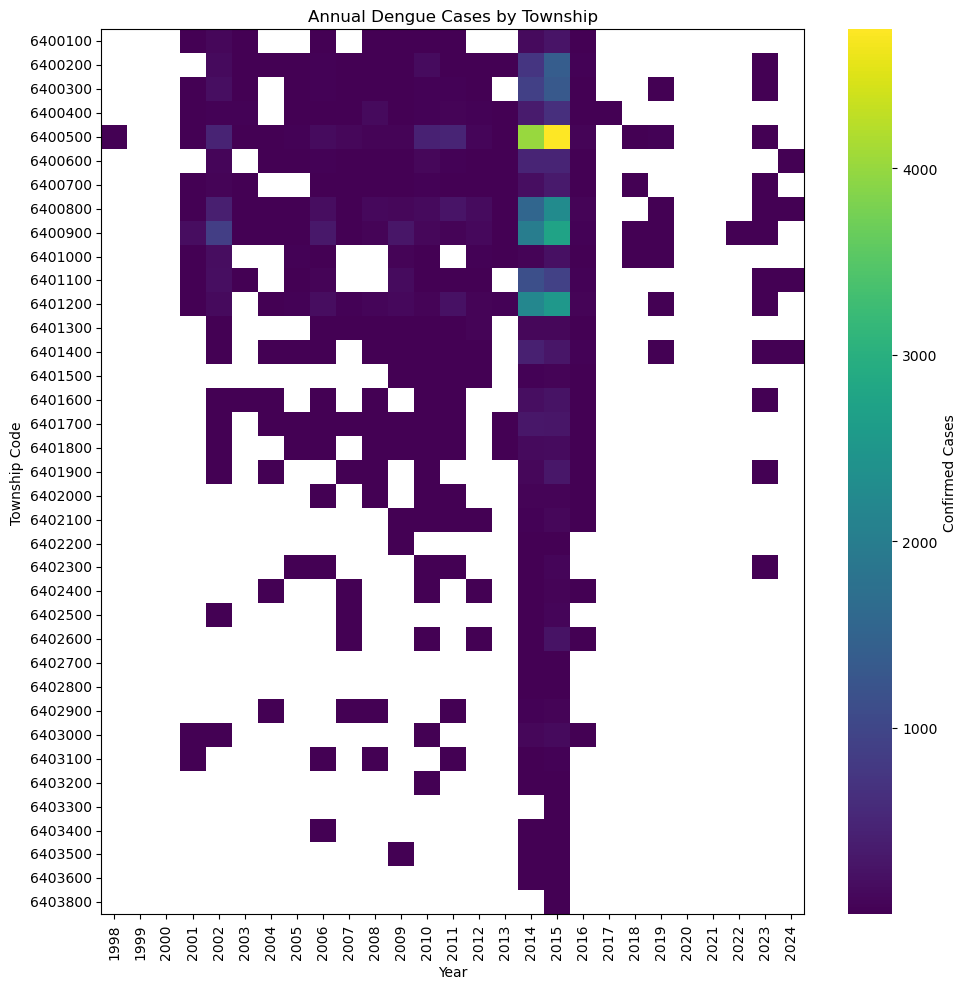

In [19]:
# Convert code column to integers 
indig_cases_ts['MOI_Township_infected_Code'] = indig_cases_ts['MOI_Township_infected_Code'].astype(int) 
indig_cases_ts['MOI_County_infected_Code'] = indig_cases_ts['MOI_County_infected_Code'].astype(int) 

# Keep only townships from specific counties (e.g. 64, 67 and 10013)
indig_cases_ts_64 = indig_cases_ts[indig_cases_ts['MOI_County_infected_Code'].isin([64])]


# Pivot the data for heatmap
heatmap_data = indig_cases_ts_64.pivot(index='MOI_Township_infected_Code', 
                                   columns='Year', 
                                   values='Number_of_confirmed_cases')

# Reindex with all years, missing values will be filled with NaN
heatmap_data = heatmap_data.reindex(columns=years)

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='.0f', cbar_kws={'label': 'Confirmed Cases'})

# Add frame around the heatmap
for spine in plt.gca().spines.values():
    spine.set_visible(True)

plt.title('Annual Dengue Cases by Township')
plt.ylabel('Township Code')
plt.tight_layout()
plt.show()

In [20]:
# Show unique township codes
print("Unique township codes with indigenous infections: ", len(indig_cases_ts['MOI_Township_infected_Code'].unique()))
print(indig_cases_ts['MOI_Township_infected_Code'].unique())

Unique township codes with indigenous infections:  199
[6703400 6400500 6703700 6703300 6703200 6400900 6703100 6401200 6703500
 6400800 6400200 6400300 6401100 6703600 6400400 6702900 1000907 6702700
 6702800 6400600 6401400 6400700 6401700 6401900 1001301 6400100 6401600
 6402600 6401000 6701800 1000901 6401800 1001303 6403000 6700700 6700100
 6701900 1001601 6701200 6401300 1001305 6402100 6702300 6702000 6402300
 6402500 6702100 6602800 6402000 6402900 6401500 6500900 6402400 6500500
 1001331 1001302 6602700 1002001 6701300 6703000 6701500 6403100 6701000
 6701400 6301100 1001313 6700400 1001015 6403500 1001330 6700200 6500300
 6701600 6800100 6700800 6701100 1001004 1001304 6700300 1001317 6402800
 6700900 6501500 6702500 6403200 1000717 6500400 1001014 6702600 1000910
 1002002 6702200 1000902 6800500 6700500 6702400 1000903 6402700 1000904
 6500800 1001310 6600200 1001319 1001306 6403600 1001318 1001005 6600300
 1001309 1000710 6700600 6500700 1001409 1001315 1001308 1001307 1001